<a href="https://colab.research.google.com/github/zaidsallam10/Feature-Selection/blob/master/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Feautes Selection Types:

# 1. Filter Methods: measure the predective power of each individual feature.
# 2. Wraper Methods: measure the predective power of a subset / combination of feeatures.
# 3. Embedded Methods: normally its done automatically by machine learning algorithms such as decision trees

# Here we will be using:
  # 1. Univariate Selection
  # 2. Feature Importance
  # 3.Correlation Matrix with Heatmap

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


univariateSelection
            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878
10             pc       9.186054
9         n_cores       9.097556
18   touch_screen       1.928429
5          four_g       1.521572
7           m_dep       0.745820
1            blue       0.723232
2     clock_speed       0.648366
3        dual_sim       0.631011
19           wifi       0.422091
17        three_g       0.327643


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


featureImportance
ram              0.391279
battery_power    0.060171
px_width         0.048459
px_height        0.047679
mobile_wt        0.036466
talk_time        0.035842
int_memory       0.035318
m_dep            0.034955
pc               0.034036
sc_w             0.033884
sc_h             0.033837
clock_speed      0.033499
n_cores          0.032731
fc               0.032296
dual_sim         0.019835
blue             0.019454
wifi             0.019347
touch_screen     0.018294
four_g           0.018021
three_g          0.014597
dtype: float64


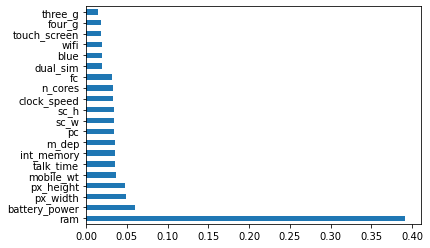

correlationMatrix
               battery_power      blue  ...      wifi  price_range
battery_power       1.000000  0.011252  ... -0.008343     0.200723
blue                0.011252  1.000000  ... -0.021863     0.020573
clock_speed         0.011482  0.021419  ... -0.024471    -0.006606
dual_sim           -0.041847  0.035198  ...  0.022740     0.017444
fc                  0.033334  0.003593  ...  0.020085     0.021998
four_g              0.015665  0.013443  ... -0.017620     0.014772
int_memory         -0.004004  0.041177  ...  0.006993     0.044435
m_dep               0.034085  0.004049  ... -0.028353     0.000853
mobile_wt           0.001844 -0.008605  ... -0.000409    -0.030302
n_cores            -0.029727  0.036161  ... -0.009964     0.004399
pc                  0.031441 -0.009952  ...  0.005389     0.033599
px_height           0.014901 -0.006872  ...  0.051824     0.148858
px_width           -0.008402 -0.041533  ...  0.030319     0.165818
ram                -0.000653  0.026351  ... 

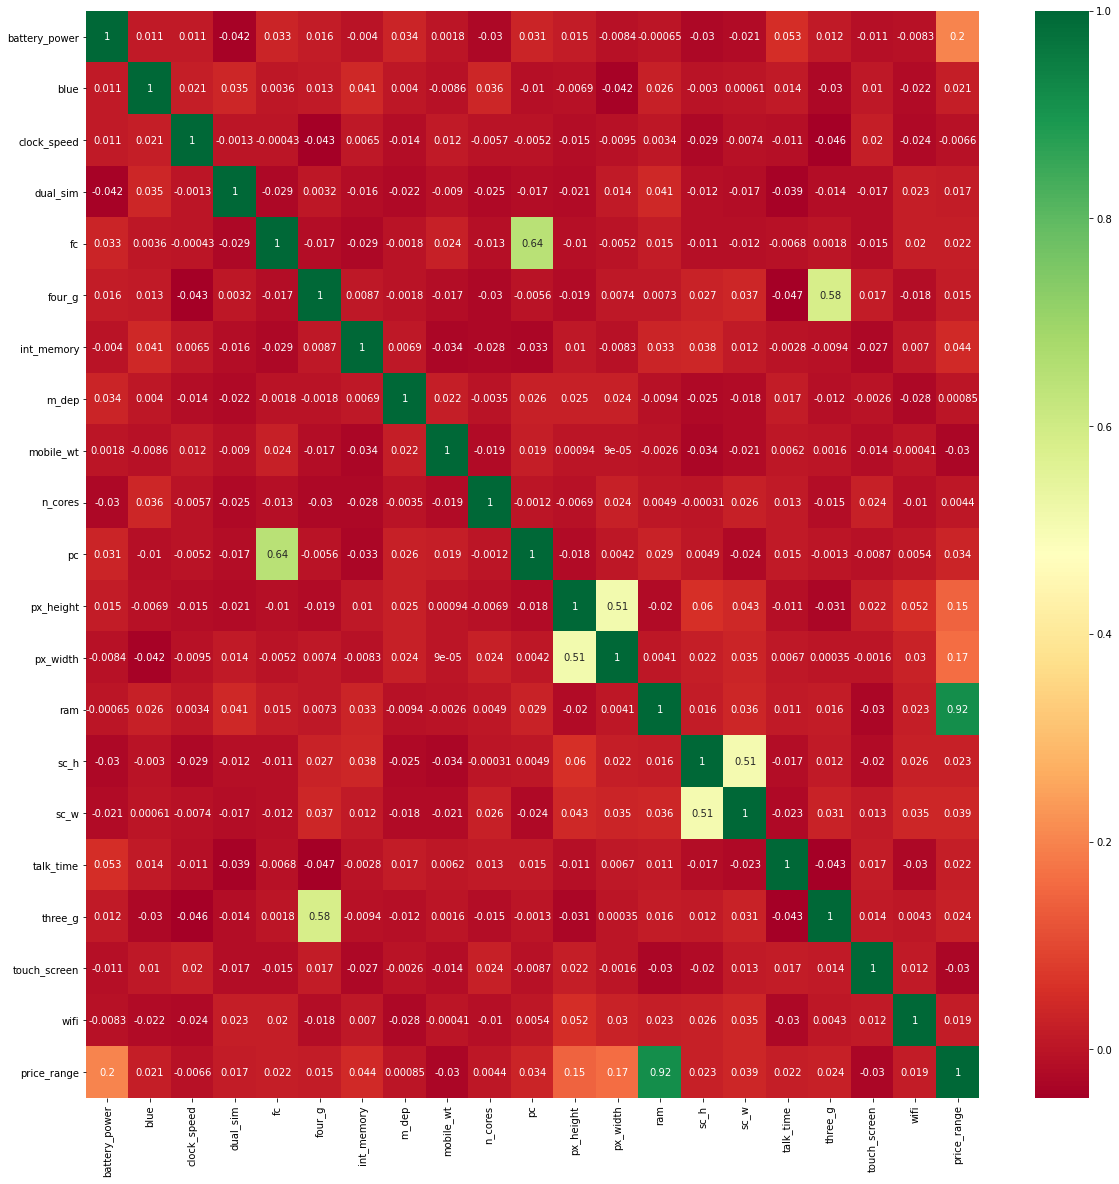

In [0]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns




# 1. Univariate Selection
# Statistical tests can be used to select those features that have the strongest relationship with the output variable.
# The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.


def univariateSelection(X,y):
  bestfeatures = SelectKBest(score_func=chi2, k='all')
  fit = bestfeatures.fit(X,y)
  dfscores = pd.DataFrame(fit.scores_)
  dfcolumns = pd.DataFrame(X.columns)
  featureScores = pd.concat([dfcolumns,dfscores],axis=1)
  featureScores.columns = ['Specs','Score']  #naming the dataframe columns
  print('univariateSelection')
  print(featureScores.nlargest(len(X),'Score'))  #print 10 best features




def featureImportance(X,y):
  model = ExtraTreesClassifier()
  model.fit(X,y)
  # print(model.feature_importances_)
  feat_importances = pd.Series(model.feature_importances_, index=X.columns)
  print('featureImportance')
  print(feat_importances.nlargest(len(X)))
  #plot
  feat_importances.nlargest(len(X)).plot(kind='barh')
  plt.show()




def correlationMatrix(data):
  corrmat = data.corr()
  top_corr_features = corrmat.index
  plt.figure(figsize=(20,20))
  print('correlationMatrix')
  print(data[top_corr_features].corr())
    #plot heat map
  g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")



data=pd.read_csv("https://datasetstestingv1.s3.amazonaws.com/mobile_classification/train.csv")
# data=pd.read_csv("https://datasetstestingv1.s3.amazonaws.com/kc_house_data.csv")


target_variable='price_range'
X = pd.DataFrame(data,columns=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'])
y = pd.DataFrame(data,columns=[target_variable])


# target_variable='price'
# X = pd.DataFrame(data,columns=[ 'bedrooms', 'bathrooms', 'floors','sqft_living', 'view'])
# y = pd.DataFrame(data,columns=[target_variable])
# print(data.columns)


univariateSelection(X,y)
featureImportance(X,y)
correlationMatrix(data)

